In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here is a (very inefficient, but instructive) way to estimate $\pi$.  We generate a random point $p=(x,y)$ in the unit square by drawing $x$ and $y$ from a uniform distribution with range $[-1,1]$.  The unit square has area $4$ and the unit circle has area $\pi$, so the probability that $p$ lies in the circle is $\pi/4$.  Thus, if we generate a large number $N$ of random points, and $n$ of them lie in the unit circle, then $n/N$ will be approximately $\pi/4$, so $4n/N$ will be approximately $\pi$.  We can check whether $p$ lies in the unit circle by testing whether $x^2+y^2\leq 1$ or not.

A first attempt is shown below.  Note that `np.random.rand()` generates random numbers in the range $[0,1]$, so we multiply by $2$ and subtract $1$ to get random numbers in the range $[-1,1]$.  We then use a loop to count how many times we have $x^2+y^2\leq 1$.

In [5]:
def estimate_pi_first(N):
    x = 2 * np.random.rand(N) - 1
    y = 2 * np.random.rand(N) - 1
    n = 0
    for i in range(N):
        if x[i]**2 + y[i]**2 <= 1:
            n += 1
    return 4 * n / N

print(estimate_pi_first(100000))
print(estimate_pi_first(100000))
print(estimate_pi_first(100000))

3.15132
3.14856
3.14372


The above function will not be very efficient when $N$ is large, because it uses an unvectorized loop.  Here is a better version.  Here `r` will be an array of length `N`, and we need to count the number of entries that are less than or equal to one.  The statement `c = (r <= 1)` sets `c` to be an array of length `N`, with `c[i] = True` whenever `r[i] <= 1` and `c[i] = False` whenever `r[i] > 1`.  Then `np.sum(c)` adds up the entries in `c`, implicitly converting `True` to `1` and `False` to `0`.  Thus, the sum is just the number of entries that are `True`, i.e. the number of points $(x, y)$ in our list for which $x^2 + y^2 \leq 1$, so the point lies in the unit circle.

In [11]:
def estimate_pi(N):
    x = 2 * np.random.rand(N) - 1
    y = 2 * np.random.rand(N) - 1
    r = x ** 2 + y ** 2  # array of squared radii
    c = (r <= 1) # array of booleans, true if radius <= 1
    n = np.sum(c) # number of true entries
    pi_estimate = 4 * n / N
    return (pi_estimate, np.abs(np.pi - pi_estimate)) # return the estimate, and the error

In [12]:
print(estimate_pi(10 ** 5))
print(estimate_pi(10 ** 6))
print(estimate_pi(10 ** 7))
print(estimate_pi(10 ** 8))

(3.1412, 0.0003926535897931238)
(3.141948, 0.00035534641020706914)
(3.1419568, 0.0003641464102068781)
(3.14176948, 0.00017682641020666523)


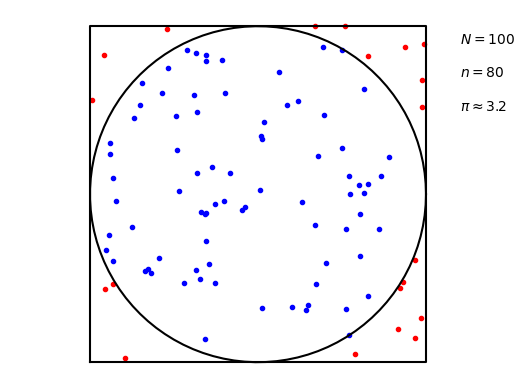

In [21]:
def estimate_pi_plot(N):
    x = 2 * np.random.rand(N) - 1
    y = 2 * np.random.rand(N) - 1
    r = x ** 2 + y ** 2  # array of squared radii
    c = (r <= 1) # array of booleans, true if radius <= 1
    n = np.sum(c) # number of points inside the circle
    pi_estimate = 4 * n / N
    plt.axis('equal')
    plt.axis('off')
    plt.plot(x[c], y[c], 'b.')
    plt.plot(x[~c], y[~c], 'r.')
    plt.plot([-1,1,1,-1,-1], [-1,-1,1,1,-1], 'k-')
    plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'k-')
    plt.text(1.2,0.9,'$N = ' + str(N) + '$')
    plt.text(1.2,0.7,'$n = ' + str(n) + '$')
    plt.text(1.2,0.5,r'$\pi \approx ' + str(pi_estimate) + '$')

estimate_pi_plot(100)